In [ ]:
import pandas as pd
from datetime import datetime

df_bnb=pd.read_csv('/content/df_bnb.csv')
df_btc=pd.read_csv('/content/df_btc.csv')
df_eth=pd.read_csv('/content/df_eth.csv')
df_xrp=pd.read_csv('/content/df_xrp.csv')
df_usdt=pd.read_csv('/content/df_usdt.csv')
df_exchange_rates=pd.read_csv('/content/df_exchange_rates.csv')
df_marketindices=pd.read_csv('/content/df_marketindices_edited.csv')
df_commodities=pd.read_csv('/content/df_commodities.csv')

In [ ]:
# Print columns in each DataFrame to verify the 'Date' column
print("Columns in df_btc:", df_btc.columns)
print("Columns in df_eth:", df_eth.columns)
print("Columns in df_bnb:", df_bnb.columns)
print("Columns in df_usdt:", df_usdt.columns)
print("Columns in df_xrp:", df_xrp.columns)
print("Columns in df_commodities:", df_commodities.columns)
print("Columns in df_exchange_rates:", df_exchange_rates.columns)
print("Columns in df_marketindices:", df_marketindices.columns)


Columns in df_btc: Index(['Unnamed: 0', 'Date', 'BTC_Open', 'BTC_High', 'BTC_Low', 'BTC_Close',
       'BTC_Volume'],
      dtype='object')
Columns in df_eth: Index(['Unnamed: 0', 'Date', 'ETH_Open', 'ETH_High', 'ETH_Low', 'ETH_Close',
       'ETH_Volume'],
      dtype='object')
Columns in df_bnb: Index(['Unnamed: 0', 'Date', 'BNB_Open', 'BNB_High', 'BNB_Low', 'BNB_Close',
       'BNB_Volume'],
      dtype='object')
Columns in df_usdt: Index(['Unnamed: 0', 'Date', 'USDT_Open', 'USDT_High', 'USDT_Low',
       'USDT_Close', 'USDT_Volume'],
      dtype='object')
Columns in df_xrp: Index(['Unnamed: 0', 'Date', 'XRP_Open', 'XRP_High', 'XRP_Low', 'XRP_Close',
       'XRP_Volume'],
      dtype='object')
Columns in df_commodities: Index(['Date', 'ALI=F', 'CL=F', 'GC=F', 'NG=F', 'SI=F'], dtype='object')
Columns in df_exchange_rates: Index(['Date', 'USDINR=X', 'EURINR=X', 'GBPINR=X', 'Unnamed: 4', 'JPYINR=X'], dtype='object')
Columns in df_marketindices: Index(['Date', '^BSESN', '^CNX100', '^NSE

In [ ]:
date_format = '%Y-%m-%d %H:%M:%S%z'  # Explicit date format
df_btc['Date'] = pd.to_datetime(df_btc['Date'], format=date_format)
df_eth['Date'] = pd.to_datetime(df_eth['Date'], format=date_format)
df_bnb['Date'] = pd.to_datetime(df_bnb['Date'], format=date_format)
df_usdt['Date'] = pd.to_datetime(df_usdt['Date'], format=date_format)
df_xrp['Date'] = pd.to_datetime(df_xrp['Date'], format=date_format)
df_commodities['Date'] = pd.to_datetime(df_commodities['Date'], format=date_format)
df_exchange_rates['Date'] = pd.to_datetime(df_exchange_rates['Date'], format=date_format)
df_marketindices['Date'] = pd.to_datetime(df_marketindices['Date'], format=date_format)


In [ ]:
# Assuming you have the following DataFrames: df_btc, df_eth, df_bnb, df_usdt, df_xrp, df_commodities, df_exchange_rates, df_marketindices

df_btc['Date'] = pd.to_datetime(df_btc['Date'], dayfirst=True)
df_eth['Date'] = pd.to_datetime(df_eth['Date'], dayfirst=True)
df_bnb['Date'] = pd.to_datetime(df_bnb['Date'], dayfirst=True)
df_usdt['Date'] = pd.to_datetime(df_usdt['Date'], dayfirst=True)
df_xrp['Date'] = pd.to_datetime(df_xrp['Date'], dayfirst=True)
df_commodities['Date'] = pd.to_datetime(df_commodities['Date'], dayfirst=True)
df_exchange_rates['Date'] = pd.to_datetime(df_exchange_rates['Date'], dayfirst=True)
df_marketindices['Date'] = pd.to_datetime(df_marketindices['Date'], dayfirst=True)

In [ ]:
# Assuming you have the following DataFrames: df_btc, df_eth, df_bnb, df_usdt, df_xrp, df_commodities, df_exchange_rates, df_marketindices

dataframes = {
    'df_btc': df_btc,
    'df_eth': df_eth,
    'df_bnb': df_bnb,
    'df_usdt': df_usdt,
    'df_xrp': df_xrp,
    'df_commodities': df_commodities,
    'df_exchange_rates': df_exchange_rates,
    'df_marketindices': df_marketindices
}

for name, df in dataframes.items():
    print(f"Shape of {name}: {df.shape}")


Shape of df_btc: (3709, 7)
Shape of df_eth: (2558, 7)
Shape of df_bnb: (2558, 7)
Shape of df_usdt: (2558, 7)
Shape of df_xrp: (2558, 7)
Shape of df_commodities: (3991, 6)
Shape of df_exchange_rates: (4134, 6)
Shape of df_marketindices: (3904, 5)


In [ ]:
#AD Fuller test
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Assuming daily_df is your DataFrame with daily BTC_Close time series data
# Make sure 'Date' is in datetime format and set as index

# Drop any remaining NaN values
df_xrp.dropna(inplace=True)

# Perform the ADF test
result = adfuller(df_xrp['XRP_Close'])

# Print the ADF Statistic, p-value, and critical values
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])


ADF Statistic: -4.324523407959615
p-value: 0.00040272462920894116
Critical Values: {'1%': -3.432936307610058, '5%': -2.8626826231161626, '10%': -2.567378261492694}


In [ ]:
#Detrending of non-stationery data
import pandas as pd

# Assuming you have a DataFrame df_btc with a column 'btc_close'

# Example data
#data = {'date': ['2023-08-01', '2023-08-02', '2023-08-03', '2023-08-04', '2023-08-05'],
        #btc_close': [40000, 40500, 41000, 40800, 41500]}

# Create the DataFrame
#df_btc = pd.DataFrame(data)

# Convert the 'date' column to datetime
#df_btc['date'] = pd.to_datetime(df_btc['date'])

# Sort by date
df_btc.sort_values(by='Date', inplace=True)

# Calculate detrended series
df_btc['detrended_btc_close'] = df_btc['BTC_Close'].diff()

# Print the original and detrended DataFrame

df_btc.head()

# Note: The first row of the detrended column will be NaN due to differencing


,Unnamed: 0,Date,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_Volume,detrended_btc_close
0,0,2014-09-17 00:00:00+00:00,27851.640625,28542.228516,27552.500000,28443.328125,1282359120,NaN
1,1,2014-09-18 00:00:00+00:00,25774.119141,27822.773438,25085.740234,27822.773438,2093992320,-620.554688
2,2,2014-09-19 00:00:00+00:00,24023.335938,25988.835938,23366.087891,25753.654297,2307413745,-2069.119141
3,3,2014-09-20 00:00:00+00:00,24881.808594,25757.560547,23724.380859,24015.851562,2243150060,-1737.802734
4,4,2014-09-21 00:00:00+00:00,24268.257812,25096.121094,23925.064453,24831.972656,1617399085,816.121094


In [ ]:
#Detrending of non-stationery data
import pandas as pd

# Assuming you have a DataFrame df_btc with a column 'btc_close'

# Example data
#data = {'date': ['2023-08-01', '2023-08-02', '2023-08-03', '2023-08-04', '2023-08-05'],
        #btc_close': [40000, 40500, 41000, 40800, 41500]}

# Create the DataFrame
#df_btc = pd.DataFrame(data)

# Convert the 'date' column to datetime
#df_btc['date'] = pd.to_datetime(df_btc['date'])

# Sort by date
df_eth.sort_values(by='Date', inplace=True)

# Calculate detrended series
df_eth['detrended_eth_close'] = df_eth['ETH_Close'].diff()

# Print the original and detrended DataFrame

df_eth.head()

# Note: The first row of the detrended column will be NaN due to differencing


,Unnamed: 0,Date,ETH_Open,ETH_High,ETH_Low,ETH_Close,ETH_Volume,detrended_eth_close
0,0,2017-11-11 00:00:00+00:00,20504.613281,20815.558594,19430.189453,19455.863281,54884332639,NaN
1,1,2017-11-12 00:00:00+00:00,20063.285156,20796.009766,19451.107422,20505.201172,105134352629,1049.337891
2,2,2017-11-13 00:00:00+00:00,20722.728516,21399.521484,20005.748047,20005.748047,68170861653,-499.453125
3,3,2017-11-14 00:00:00+00:00,22081.068359,22287.546875,20725.802734,20725.802734,69957072000,720.054688
4,4,2017-11-15 00:00:00+00:00,21754.876953,22277.746094,21523.595703,22102.845703,47161182116,1377.042969


In [ ]:
#Detrending of non-stationery data
import pandas as pd

# Assuming you have a DataFrame df_btc with a column 'btc_close'

# Example data
#data = {'date': ['2023-08-01', '2023-08-02', '2023-08-03', '2023-08-04', '2023-08-05'],
        #btc_close': [40000, 40500, 41000, 40800, 41500]}

# Create the DataFrame
#df_btc = pd.DataFrame(data)

# Convert the 'date' column to datetime
#df_btc['date'] = pd.to_datetime(df_btc['date'])

# Sort by date
df_bnb.sort_values(by='Date', inplace=True)

# Calculate detrended series
df_bnb['detrended_bnb_close'] = df_bnb['BNB_Close'].diff()

# Print the original and detrended DataFrame

df_bnb.head()

# Note: The first row of the detrended column will be NaN due to differencing


,Unnamed: 0,Date,BNB_Open,BNB_High,BNB_Low,BNB_Close,BNB_Volume,detrended_bnb_close
0,0,2017-11-11 00:00:00+00:00,108.847824,124.960587,105.187134,116.394005,532888254,NaN
1,1,2017-11-12 00:00:00+00:00,99.023003,108.999641,95.300415,108.744873,996863292,-7.649132
2,2,2017-11-13 00:00:00+00:00,110.355545,113.505013,98.886818,99.434814,800784684,-9.310059
3,3,2017-11-14 00:00:00+00:00,104.154732,113.545265,102.564857,110.529594,512055840,11.094780
4,4,2017-11-15 00:00:00+00:00,99.877167,106.273689,97.596329,103.840157,496987530,-6.689438


In [ ]:
#Detrending of non-stationery data
import pandas as pd

# Assuming you have a DataFrame df_btc with a column 'btc_close'

# Example data
#data = {'date': ['2023-08-01', '2023-08-02', '2023-08-03', '2023-08-04', '2023-08-05'],
        #btc_close': [40000, 40500, 41000, 40800, 41500]}

# Create the DataFrame
#df_btc = pd.DataFrame(data)

# Convert the 'date' column to datetime
#df_btc['date'] = pd.to_datetime(df_btc['date'])

# Sort by date
df_usdt.sort_values(by='Date', inplace=True)

# Calculate detrended series
df_usdt['detrended_bnb_close'] = df_usdt['USDT_Close'].diff()

# Print the original and detrended DataFrame

df_usdt.head()

# Note: The first row of the detrended column will be NaN due to differencing


,Unnamed: 0,Date,USDT_Open,USDT_High,USDT_Low,USDT_Close,USDT_Volume,detrended_bnb_close
0,0,2017-11-11 00:00:00+00:00,65.745789,66.867844,64.886261,65.549660,48624214395,NaN
1,1,2017-11-12 00:00:00+00:00,65.972549,72.061089,63.048882,65.552261,95528471685,0.002602
2,2,2017-11-13 00:00:00+00:00,66.041763,67.243515,63.796116,65.451920,50242652214,-0.100342
3,3,2017-11-14 00:00:00+00:00,65.846680,66.308723,65.269402,65.772850,28112712154,0.320930
4,4,2017-11-15 00:00:00+00:00,65.467529,65.968399,65.276314,65.699532,29345529982,-0.073318


In [ ]:
# Drop 'Unnamed: 0' columns in all DataFrames before merging
df_btc = df_btc.drop(columns=['Unnamed: 0'], errors='ignore')
df_eth = df_eth.drop(columns=['Unnamed: 0'], errors='ignore')
df_bnb = df_bnb.drop(columns=['Unnamed: 0'], errors='ignore')
df_usdt = df_usdt.drop(columns=['Unnamed: 0'], errors='ignore')
df_xrp = df_xrp.drop(columns=['Unnamed: 0'], errors='ignore')
df_commodities = df_commodities.drop(columns=['Unnamed: 0'], errors='ignore')
df_exchange_rates = df_exchange_rates.drop(columns=['Unnamed: 0'], errors='ignore')
df_marketindices = df_marketindices.drop(columns=['Unnamed: 0'], errors='ignore')


In [ ]:
from functools import reduce

# List of DataFrames to merge
dataframes_to_merge = [df_btc, df_eth, df_bnb, df_usdt, df_xrp, df_commodities, df_exchange_rates, df_marketindices]

# Merge the DataFrames using reduce
df_merged = reduce(lambda left, right: pd.merge(left, right, on='Date', how='outer'), dataframes_to_merge)

print("Shape of merged dataframe is:  ", df_merged.shape)
print(df_merged.isnull().sum())

df_merged.head()


Shape of merged dataframe is:   (5199, 44)
Date                        2
BTC_Open                 1490
BTC_High                 1490
BTC_Low                  1490
BTC_Close                1490
BTC_Volume               1490
detrended_btc_close      1491
ETH_Open                 2641
ETH_High                 2641
ETH_Low                  2641
ETH_Close                2641
ETH_Volume               2641
detrended_eth_close      2642
BNB_Open                 2641
BNB_High                 2641
BNB_Low                  2641
BNB_Close                2641
BNB_Volume               2641
detrended_bnb_close_x    2642
USDT_Open                2641
USDT_High                2641
USDT_Low                 2641
USDT_Close               2641
USDT_Volume              2641
detrended_bnb_close_y    2642
XRP_Open                 2641
XRP_High                 2641
XRP_Low                  2641
XRP_Close                2641
XRP_Volume               2641
ALI=F                    2588
CL=F                     12

,Date,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_Volume,detrended_btc_close,ETH_Open,ETH_High,ETH_Low,...,SI=F,USDINR=X,EURINR=X,GBPINR=X,Unnamed: 4,JPYINR=X,^BSESN,^CNX100,^NSEI,^NSEMDCP50
0,2014-09-17 00:00:00+00:00,27851.640625,28542.228516,27552.500000,28443.328125,1.282359e+09,NaN,NaN,NaN,NaN,...,18.663,61.053001,78.984001,99.211998,NaN,0.55677,26631.28906,7923.500000,7975.500000,3234.130127
1,2014-09-18 00:00:00+00:00,25774.119141,27822.773438,25085.740234,27822.773438,2.093992e+09,-620.554688,NaN,NaN,NaN,...,18.452,60.908001,79.042000,98.987000,NaN,0.56971,27112.21094,8065.700195,8114.750000,3316.625732
2,2014-09-19 00:00:00+00:00,24023.335938,25988.835938,23366.087891,25753.654297,2.307414e+09,-2069.119141,NaN,NaN,NaN,...,17.781,60.689999,78.190002,99.732002,NaN,0.56930,27090.41992,8062.799805,8121.450195,3282.827393
3,2014-09-20 00:00:00+00:00,24881.808594,25757.560547,23724.380859,24015.851562,2.243150e+09,-1737.802734,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-09-21 00:00:00+00:00,24268.257812,25096.121094,23925.064453,24831.972656,1.617399e+09,816.121094,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Drop the column 'Unnamed: 4' from the merged dataframe
df_merged.drop(columns=['Unnamed: 4'], inplace=True)

# Display the updated dataframe
print(df_merged.head())


                       Date      BTC_Open      BTC_High       BTC_Low  \
0 2014-09-17 00:00:00+00:00  27851.640625  28542.228516  27552.500000   
1 2014-09-18 00:00:00+00:00  25774.119141  27822.773438  25085.740234   
2 2014-09-19 00:00:00+00:00  24023.335938  25988.835938  23366.087891   
3 2014-09-20 00:00:00+00:00  24881.808594  25757.560547  23724.380859   
4 2014-09-21 00:00:00+00:00  24268.257812  25096.121094  23925.064453   

      BTC_Close    BTC_Volume  detrended_btc_close  ETH_Open  ETH_High  \
0  28443.328125  1.282359e+09                  NaN       NaN       NaN   
1  27822.773438  2.093992e+09          -620.554688       NaN       NaN   
2  25753.654297  2.307414e+09         -2069.119141       NaN       NaN   
3  24015.851562  2.243150e+09         -1737.802734       NaN       NaN   
4  24831.972656  1.617399e+09           816.121094       NaN       NaN   

   ETH_Low  ...   NG=F    SI=F   USDINR=X   EURINR=X   GBPINR=X  JPYINR=X  \
0      NaN  ...  4.013  18.663  61.0530

In [ ]:
df_merged.isnull().sum()

,0
Date,2
BTC_Open,1490
BTC_High,1490
BTC_Low,1490
BTC_Close,1490
BTC_Volume,1490
detrended_btc_close,1491
ETH_Open,2641
ETH_High,2641
ETH_Low,2641


In [ ]:
df_merged.dropna(inplace=True)
print("Shape after dropping nulls: ", df_merged.shape)
df_merged.head()



Shape after dropping nulls:  (1670, 43)


,Date,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_Volume,detrended_btc_close,ETH_Open,ETH_High,ETH_Low,...,NG=F,SI=F,USDINR=X,EURINR=X,GBPINR=X,JPYINR=X,^BSESN,^CNX100,^NSEI,^NSEMDCP50
1153,2017-11-13 00:00:00+00:00,429187.43750,445656.15625,380813.93750,386936.37500,4.098044e+11,-23275.15625,20722.728516,21399.521484,20005.748047,...,3.167,17.023001,65.160301,75.593002,85.767998,0.56922,33033.55859,10632.65039,10224.95020,5088.482422
1154,2017-11-14 00:00:00+00:00,433978.06250,441973.06250,422663.06250,429317.62500,2.090910e+11,42381.25000,22081.068359,22287.546875,20725.802734,...,3.102,17.052000,65.438400,75.902000,85.809998,0.57237,32941.87109,10593.79980,10186.59961,5080.232910
1155,2017-11-15 00:00:00+00:00,477412.15625,479155.25000,433913.28125,433913.28125,2.741494e+11,4595.65625,21754.876953,22277.746094,21523.595703,...,3.080,16.950001,65.413399,76.259003,86.060997,0.57371,32760.43945,10514.90039,10118.04980,5023.335938
1157,2017-11-17 00:00:00+00:00,501161.46875,522619.65625,490809.25000,512759.56250,3.024051e+11,34844.90625,21608.935547,21776.009766,21292.271484,...,3.097,17.358000,65.209999,77.055000,86.063004,0.57554,33342.80078,10701.29980,10283.59961,5140.479980
1160,2017-11-20 00:00:00+00:00,533820.62500,542687.93750,516907.12500,522619.93750,2.270807e+11,17750.34375,23872.291016,24224.257812,22967.318359,...,3.047,16.827000,64.904999,76.818001,85.749001,0.57616,33359.89844,10716.40039,10298.75000,5185.427734


In [ ]:
df_merged.isnull().sum()

,0
Date,0
BTC_Open,0
BTC_High,0
BTC_Low,0
BTC_Close,0
BTC_Volume,0
detrended_btc_close,0
ETH_Open,0
ETH_High,0
ETH_Low,0


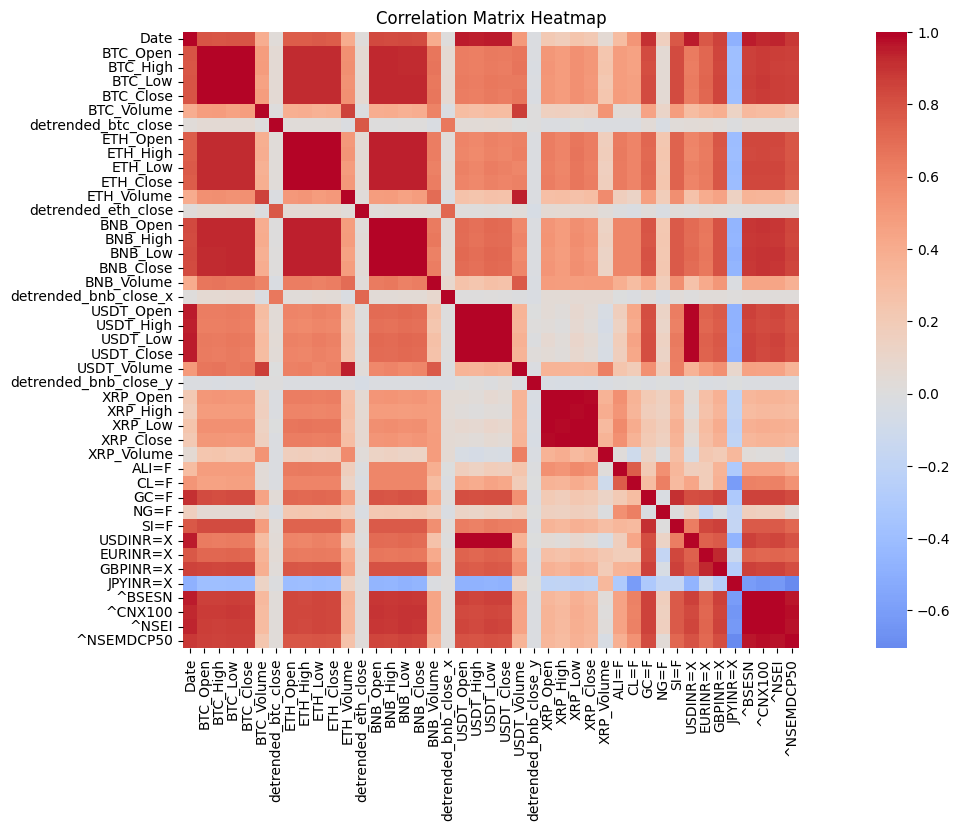

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_merged is your DataFrame
# Replace this with your actual data

# Create the correlation matrix
correlation_matrix = df_merged.corr()

# Create a heatmap
plt.figure(figsize=(20, 8))  # Adjust the size as needed

# Specify annotation font size and adjust cell size
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            annot_kws={"size": 10}, square=True)

plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
import pandas as pd
from openpyxl import load_workbook
from openpyxl.styles import PatternFill
from openpyxl.formatting.rule import CellIsRule

# Assuming df_merged is your DataFrame
# Calculate and round the correlation matrix
cormat = df_merged.corr().round(2)

# Save the rounded correlation matrix to a CSV file
cormat.to_csv('corrematrix.csv', index=True)

# Convert the correlation matrix to an Excel file
excel_path = 'corrematrix.xlsx'
cormat.to_excel(excel_path, index=True)

# Load the Excel file
wb = load_workbook(excel_path)
ws = wb.active

# Define the fill color for highlighting
highlight_fill = PatternFill(start_color="FFEE08", end_color="FFEE08", fill_type="solid")

# Apply conditional formatting to highlight values > 0.7
for row in ws.iter_rows(min_row=2, min_col=2, max_row=ws.max_row, max_col=ws.max_column):
    for cell in row:
        if cell.value is not None and cell.value > 0.7:
            cell.fill = highlight_fill

# Save the updated Excel file
wb.save(excel_path)

# Optionally, download the Excel file
from google.colab import files
files.download(excel_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#correlation matrix
import pandas as pd

# Assuming you have already calculated the correlation matrix and stored it in 'cormat'
cormat = df_merged.corr()
# Round the correlation matrix to 2 decimal places
cormat_rounded = cormat.round(2)

# Save the correlation matrix to a CSV file
cormat_rounded.to_csv('corrematrix.csv', index=True)  # Set index=True to include row indices in the CSV


In [ ]:
#Feature Selection
selected_col_btc=['BTC_Open', 'BTC_High','BTC_Low','ETH_Open','ETH_High','ETH_Low','ETH_Close','BNB_Open','BNB_High','BNB_Low','BNB_Close',
'GC=F','SI=F','EURINR=X',
'GBPINR=X',
'^BSESN',
'^CNX100',
'^NSEI',
'^NSEMDCP50',
'BTC_Close'
]
df_reg_btc=df_merged[selected_col_btc]
#df_reg_btc=pd.DataFrame(df_reg_btc)
df_reg_btc.head()

,BTC_Open,BTC_High,BTC_Low,ETH_Open,ETH_High,ETH_Low,ETH_Close,BNB_Open,BNB_High,BNB_Low,BNB_Close,GC=F,SI=F,EURINR=X,GBPINR=X,^BSESN,^CNX100,^NSEI,^NSEMDCP50,BTC_Close
1153,429187.43750,445656.15625,380813.93750,20722.728516,21399.521484,20005.748047,20005.748047,110.355545,113.505013,98.886818,99.434814,1277.300049,17.023001,75.593002,85.767998,33033.55859,10632.65039,10224.95020,5088.482422,386936.37500
1154,433978.06250,441973.06250,422663.06250,22081.068359,22287.546875,20725.802734,20725.802734,104.154732,113.545265,102.564857,110.529594,1281.500000,17.052000,75.902000,85.809998,32941.87109,10593.79980,10186.59961,5080.232910,429317.62500
1155,477412.15625,479155.25000,433913.28125,21754.876953,22277.746094,21523.595703,22102.845703,99.877167,106.273689,97.596329,103.840157,1276.500000,16.950001,76.259003,86.060997,32760.43945,10514.90039,10118.04980,5023.335938,433913.28125
1157,501161.46875,522619.65625,490809.25000,21608.935547,21776.009766,21292.271484,21556.603516,98.188507,103.331871,97.209457,103.161461,1295.800049,17.358000,77.055000,86.063004,33342.80078,10701.29980,10283.59961,5140.479980,512759.56250
1160,533820.62500,542687.93750,516907.12500,23872.291016,24224.257812,22967.318359,23019.650391,105.743568,108.100014,101.130203,105.679604,1274.599976,16.827000,76.818001,85.749001,33359.89844,10716.40039,10298.75000,5185.427734,522619.93750


In [ ]:
#Feature Selection
selected_col_eth=['BTC_Open', 'BTC_High','BTC_Low','BTC_Close', 'ETH_Open','ETH_High','ETH_Low','BNB_Open','BNB_High','BNB_Low','BNB_Close',
'GC=F','SI=F',
'GBPINR=X',
'^BSESN',
'^CNX100',
'^NSEI',
'^NSEMDCP50',
'ETH_Close'
]
df_reg_eth=df_merged[selected_col_eth]
#df_reg_btc=pd.DataFrame(df_reg_btc)
df_reg_eth.shape

(1670, 19)

In [ ]:
#Feature Selection
selected_col_bnb=['BTC_Open', 'BTC_High','BTC_Low','BTC_Close', 'ETH_Open','ETH_High','ETH_Low','ETH_Close','BNB_Open','BNB_High','BNB_Low', 'USDT_Open',
                  'USDT_Low','USDT_Close','GC=F','SI=F','USDINR=X',

'GBPINR=X',
'^BSESN',
'^CNX100',
'^NSEI',
'^NSEMDCP50',
'BNB_Close'
]
df_reg_bnb=df_merged[selected_col_bnb]
#df_reg_btc=pd.DataFrame(df_reg_btc)
df_reg_bnb.shape

(1670, 23)

In [ ]:
#Feature Selection
selected_col_usdt=[ 'BNB_Open','BNB_High','BNB_Low','BNB_Close',
'GC=F',
'USDINR=X','EURINR=X', 'GBPINR=X',
'^BSESN',
'^CNX100',
'^NSEI',
'^NSEMDCP50',
'USDT_Close','USDT_Open','USDT_High', 'USDT_Low'
]
df_reg_usdt=df_merged[selected_col_usdt]
#df_reg_btc=pd.DataFrame(df_reg_btc)
df_reg_usdt.shape

(1670, 16)

In [ ]:
#Feature Selection
selected_col_xrp=[

'XRP_Close','XRP_Open','XRP_High', 'XRP_Low'
]
df_reg_xrp=df_merged[selected_col_xrp]
#df_reg_btc=pd.DataFrame(df_reg_btc)
df_reg_xrp.shape

(1670, 4)

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.5 MB/s eta 0:00:00
   ━━━

In [ ]:
#regression for BTC


from pycaret.datasets import get_data
data=df_reg_btc
from pycaret.regression import *
s=setup(data, target='BTC_Close', normalize = True, normalize_method = 'robust')
from pycaret.regression import RegressionExperiment
exp=RegressionExperiment()
exp.setup(data, target='BTC_Close',normalize = True, normalize_method = 'robust')
best_btc=compare_models()
best_btc

,Description,Value
0,Session id,8150
1,Target,BTC_Close
2,Target type,Regression
3,Original data shape,"(1670, 20)"
4,Transformed data shape,"(1670, 20)"
5,Transformed train set shape,"(1169, 20)"
6,Transformed test set shape,"(501, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,5336
1,Target,BTC_Close
2,Target type,Regression
3,Original data shape,"(1670, 20)"
4,Transformed data shape,"(1670, 20)"
5,Transformed train set shape,"(1169, 20)"
6,Transformed test set shape,"(501, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,14483.5582,643140976.0000,24921.8445,0.9998,0.0119,0.0077,0.0440
br,Bayesian Ridge,14473.3801,643352748.8000,24923.6721,0.9998,0.0119,0.0077,0.0660
llar,Lasso Least Angle Regression,14834.5360,663090512.0000,25294.0051,0.9997,0.0122,0.0079,0.0430
lasso,Lasso Regression,25270.2701,1875772979.2000,42907.7008,0.9993,0.0191,0.0132,0.0470
ridge,Ridge Regression,25293.1074,1877170310.4000,42754.2822,0.9993,0.0196,0.0137,0.0380
et,Extra Trees Regressor,33545.0050,3310702645.0726,57084.7196,0.9988,0.0245,0.0168,0.5800
gbr,Gradient Boosting Regressor,37968.6331,3818010465.2084,61237.4797,0.9986,0.0275,0.0201,0.8050
lightgbm,Light Gradient Boosting Machine,34077.6702,3678848379.5823,59881.5515,0.9986,0.0248,0.0172,1.2800
rf,Random Forest Regressor,35289.7293,3663314587.9152,60010.0846,0.9986,0.0256,0.0176,1.8580
huber,Huber Regressor,41399.6434,4438560787.1192,65549.3207,0.9983,0.0316,0.0235,0.1310


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

In [ ]:
# Import necessary libraries
#import pandas as pd
#from pycaret.regression import RegressionExperiment

# Assuming 'data' is already defined as your BTC dataset (e.g., data = df_reg_btc)
# Setup the regression experiment
##exp = RegressionExperiment()
#exp.setup(data, target='BTC_Close', normalize=True, normalize_method='robust')

# Compare models and get the best model
best_btc = exp.compare_models()

# Get the comparison results as a DataFrame
comparison_df = exp.pull()  # This pulls the results of the model comparison

# Save the comparison results to an Excel file
excel_path = 'BTC_regression_results.xlsx'
comparison_df.to_excel(excel_path, index=False)

# Optionally, download the file if using a notebook environment like Google Colab
from google.colab import files
files.download(excel_path)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,14355.1916,586092905.6000,23901.9551,0.9998,0.0114,0.0076,0.0640
llar,Lasso Least Angle Regression,14672.9997,630622697.6000,24614.8641,0.9998,0.0121,0.0079,0.0450
br,Bayesian Ridge,14353.9754,585828409.6000,23895.5660,0.9998,0.0114,0.0076,0.0590
lasso,Lasso Regression,25962.5371,1895749043.2000,43190.8730,0.9993,0.0209,0.0139,0.0870
ridge,Ridge Regression,25964.6248,1870220684.8000,42984.6539,0.9993,0.0213,0.0145,0.0530
lightgbm,Light Gradient Boosting Machine,33771.2160,3353085238.8314,56950.1388,0.9987,0.0269,0.0178,0.5660
et,Extra Trees Regressor,35043.0080,3655881932.7529,59628.5483,0.9986,0.0266,0.0179,0.8400
rf,Random Forest Regressor,36158.9659,3951370894.1701,61844.5949,0.9985,0.0286,0.0186,1.5530
gbr,Gradient Boosting Regressor,38777.2786,4243097840.8959,63791.7184,0.9984,0.0309,0.0213,0.7360
huber,Huber Regressor,42217.4522,4330653770.3993,65383.9445,0.9983,0.0331,0.0246,0.0770


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#regression for ETH


from pycaret.datasets import get_data
data=df_reg_eth
from pycaret.regression import *
s=setup(data, target='ETH_Close', normalize = True, normalize_method = 'robust')
from pycaret.regression import RegressionExperiment
exp=RegressionExperiment()
exp.setup(data, target='ETH_Close',normalize = True, normalize_method = 'robust')
best_eth=compare_models()
best_eth

,Description,Value
0,Session id,8849
1,Target,ETH_Close
2,Target type,Regression
3,Original data shape,"(1670, 19)"
4,Transformed data shape,"(1670, 19)"
5,Transformed train set shape,"(1169, 19)"
6,Transformed test set shape,"(501, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,8986
1,Target,ETH_Close
2,Target type,Regression
3,Original data shape,"(1670, 19)"
4,Transformed data shape,"(1670, 19)"
5,Transformed train set shape,"(1169, 19)"
6,Transformed test set shape,"(501, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,983.9373,3267403.6250,1780.7151,0.9997,0.0167,0.0105,0.0670
br,Bayesian Ridge,984.7558,3261113.8250,1779.4524,0.9997,0.0167,0.0104,0.0600
llar,Lasso Least Angle Regression,1029.9848,3394110.1250,1817.6862,0.9996,0.0169,0.0106,0.0450
huber,Huber Regressor,1469.8084,6216146.9482,2472.6745,0.9993,0.0211,0.0143,0.0900
lasso,Lasso Regression,1651.4782,8110795.1000,2813.5914,0.9991,0.0259,0.0173,0.0820
ridge,Ridge Regression,1790.9296,8948013.4500,2963.9806,0.9990,0.0268,0.0193,0.0680
lightgbm,Light Gradient Boosting Machine,2280.5351,15061817.9110,3848.5630,0.9984,0.0330,0.0227,0.5870
et,Extra Trees Regressor,2312.3357,16016793.2416,3935.8546,0.9983,0.0320,0.0218,0.7570
rf,Random Forest Regressor,2340.9936,16822915.3099,4047.6847,0.9982,0.0329,0.0223,1.4990
gbr,Gradient Boosting Regressor,2460.1784,17253356.1014,4100.4816,0.9982,0.0378,0.0261,0.6520


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

ValueError: Invalid value for the target parameter. Column BTC_Close not found in the data.

In [ ]:
#regression for BNB


from pycaret.datasets import get_data
data=df_reg_bnb
from pycaret.regression import *
s=setup(data, target='BNB_Close', normalize = True, normalize_method = 'robust')
from pycaret.regression import RegressionExperiment
exp=RegressionExperiment()
exp.setup(data, target='BNB_Close',normalize = True, normalize_method = 'robust')
best_bnb=compare_models()
best_bnb

,Description,Value
0,Session id,1932
1,Target,BNB_Close
2,Target type,Regression
3,Original data shape,"(1670, 23)"
4,Transformed data shape,"(1670, 23)"
5,Transformed train set shape,"(1169, 23)"
6,Transformed test set shape,"(501, 23)"
7,Numeric features,22
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,7041
1,Target,BNB_Close
2,Target type,Regression
3,Original data shape,"(1670, 23)"
4,Transformed data shape,"(1670, 23)"
5,Transformed train set shape,"(1169, 23)"
6,Transformed test set shape,"(501, 23)"
7,Numeric features,22
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,165.5141,89906.5324,294.6173,0.9996,0.1133,0.0443,0.0720
br,Bayesian Ridge,165.5433,89886.7324,294.5384,0.9996,0.1135,0.0442,0.0610
llar,Lasso Least Angle Regression,193.8312,129716.4406,351.2691,0.9995,0.1657,0.0415,0.0450
huber,Huber Regressor,233.2554,203771.2502,435.0984,0.9992,0.1823,0.0536,0.0910
lasso,Lasso Regression,251.4464,235667.1648,462.8798,0.9991,0.1535,0.0593,0.0780
ridge,Ridge Regression,257.5518,251533.5945,483.0645,0.9990,0.1150,0.0480,0.0650
et,Extra Trees Regressor,319.0686,459628.1485,662.0712,0.9982,0.0391,0.0242,0.9100
gbr,Gradient Boosting Regressor,339.5495,453893.7927,667.5149,0.9982,0.0830,0.0441,0.9130
par,Passive Aggressive Regressor,318.0280,455207.6558,652.8584,0.9982,0.0934,0.0277,0.0720
lightgbm,Light Gradient Boosting Machine,327.0142,477180.2690,680.9172,0.9981,0.0548,0.0311,0.5060


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

In [ ]:
#regression for USDT


from pycaret.datasets import get_data
data=df_reg_usdt
from pycaret.regression import *
s=setup(data, target='USDT_Close', normalize = True, normalize_method = 'robust')
from pycaret.regression import RegressionExperiment
exp=RegressionExperiment()
exp.setup(data, target='USDT_Close',normalize = True, normalize_method = 'robust')
best_usdt=compare_models()
best_usdt

,Description,Value
0,Session id,3361
1,Target,USDT_Close
2,Target type,Regression
3,Original data shape,"(1670, 16)"
4,Transformed data shape,"(1670, 16)"
5,Transformed train set shape,"(1169, 16)"
6,Transformed test set shape,"(501, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,4094
1,Target,USDT_Close
2,Target type,Regression
3,Original data shape,"(1670, 16)"
4,Transformed data shape,"(1670, 16)"
5,Transformed train set shape,"(1169, 16)"
6,Transformed test set shape,"(501, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.1558,0.0783,0.2699,0.9976,0.0037,0.0021,0.0920
lr,Linear Regression,0.1589,0.0796,0.2732,0.9975,0.0038,0.0022,0.0350
ridge,Ridge Regression,0.1618,0.0811,0.2765,0.9975,0.0038,0.0022,0.0390
br,Bayesian Ridge,0.1586,0.0795,0.2728,0.9975,0.0038,0.0022,0.0600
rf,Random Forest Regressor,0.1521,0.0849,0.2794,0.9974,0.0039,0.0021,2.1900
lightgbm,Light Gradient Boosting Machine,0.1625,0.0863,0.2827,0.9973,0.0040,0.0022,1.1650
et,Extra Trees Regressor,0.1505,0.0904,0.2863,0.9972,0.0040,0.0021,0.6670
gbr,Gradient Boosting Regressor,0.1714,0.0966,0.2991,0.9970,0.0042,0.0024,0.7820
par,Passive Aggressive Regressor,0.2038,0.1050,0.3122,0.9968,0.0043,0.0028,0.0400
xgboost,Extreme Gradient Boosting,0.1797,0.1089,0.3194,0.9967,0.0045,0.0025,0.2770


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

HuberRegressor()

In [ ]:
#regression for XRP


from pycaret.datasets import get_data
data=df_reg_xrp
from pycaret.regression import *
s=setup(data, target='XRP_Close', normalize = True, normalize_method = 'robust')
from pycaret.regression import RegressionExperiment
exp=RegressionExperiment()
exp.setup(data, target='XRP_Close',normalize = True, normalize_method = 'robust')
best_xrp=compare_models()
best_xrp

,Description,Value
0,Session id,2763
1,Target,XRP_Close
2,Target type,Regression
3,Original data shape,"(1670, 4)"
4,Transformed data shape,"(1670, 4)"
5,Transformed train set shape,"(1169, 4)"
6,Transformed test set shape,"(501, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,1651
1,Target,XRP_Close
2,Target type,Regression
3,Original data shape,"(1670, 4)"
4,Transformed data shape,"(1670, 4)"
5,Transformed train set shape,"(1169, 4)"
6,Transformed test set shape,"(501, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.7854,4.2801,1.8128,0.9922,0.0270,0.0169,0.0700
lar,Least Angle Regression,0.8581,4.9835,1.9233,0.9910,0.0296,0.0200,0.0450
br,Bayesian Ridge,0.8581,4.9868,1.9240,0.9910,0.0296,0.0200,0.0550
lr,Linear Regression,0.8581,4.9836,1.9233,0.9910,0.0296,0.0200,0.0290
ridge,Ridge Regression,0.8727,5.2282,2.0049,0.9905,0.0307,0.0201,0.0270
par,Passive Aggressive Regressor,1.5376,5.8375,2.3070,0.9882,0.0557,0.0460,0.0550
lasso,Lasso Regression,1.6748,9.3111,2.8722,0.9814,0.0616,0.0477,0.0280
llar,Lasso Least Angle Regression,1.6731,9.3035,2.8706,0.9814,0.0615,0.0476,0.0480
gbr,Gradient Boosting Regressor,1.1837,10.6940,2.8174,0.9802,0.0398,0.0257,0.3020
rf,Random Forest Regressor,1.0803,10.8496,2.8127,0.9802,0.0390,0.0228,0.3910


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

HuberRegressor()

In [ ]:
help(plot_model)

Help on function plot_model in module pycaret.regression.functional:

plot_model(estimator, plot: str = 'residuals', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    
    Example
    --------
    >>> from pycaret.datasets import get_data
    >>> boston = get_data('boston')
    >>> from pycaret.regression import *
    >>> exp_name = setup(data = boston,  target = 'medv')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'residual')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'residual'
        List of available plots (ID - Name):
    
       

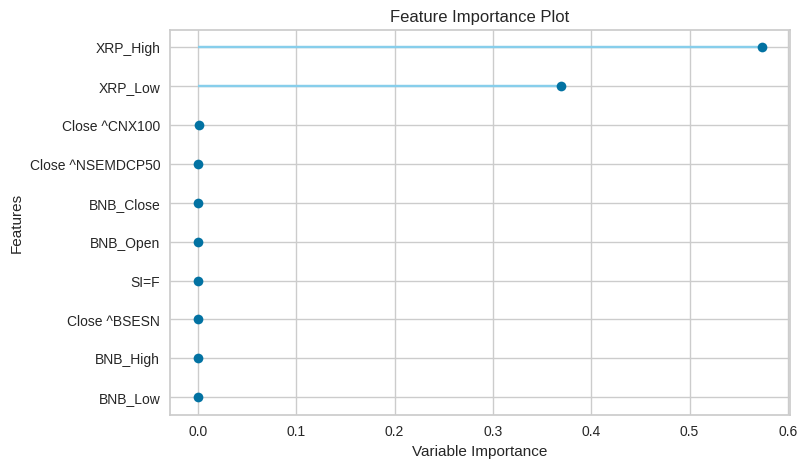

In [ ]:
plot_model(best_xrp, plot='feature')

In [ ]:
holdout_pred = predict_model(best_xrp)
holdout_pred.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,0.9123,4.3630,2.0888,0.9927,0.0346,0.0221


,Date,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_Volume,ETH_Open,ETH_High,ETH_Low,ETH_Close,...,EURINR=X,GBPINR=X,JPYINR=X,USDINR=X,Close ^BSESN,Close ^CNX100,Close ^NSEI,Close ^NSEMDCP50,XRP_Close,prediction_label
1248,2018-02-16,6.475699e+05,6.629104e+05,6.308517e+05,6.574258e+05,4.687050e+11,59723.476562,60695.820312,58707.855469,60656.050781,...,79.817001,90.139000,0.601600,63.890900,34010.761719,10831.349609,10452.299805,5131.250000,73.107048,70.956095
1665,2019-04-09,3.679799e+05,3.679799e+05,3.584181e+05,3.605554e+05,1.019820e+12,12536.702148,12538.934570,12170.627930,12199.726562,...,78.277000,90.822998,0.623360,69.552498,38939.218750,11825.650391,11671.950195,5066.649902,24.207752,24.458936
3110,2023-03-24,2.253117e+06,2.358022e+06,2.241500e+06,2.330910e+06,1.992510e+12,143359.031250,152159.156250,142867.453125,149427.578125,...,89.045998,100.998276,0.628396,82.265297,57527.101562,16831.800781,16945.050781,8283.750000,36.595867,37.184419
3087,2023-03-01,1.913092e+06,1.970337e+06,1.913343e+06,1.948952e+06,2.032720e+12,132716.187500,137100.453125,132719.515625,137100.453125,...,87.341003,99.450630,0.605706,82.635399,59411.078125,17238.449219,17450.900391,8567.700195,31.639364,31.924075
2277,2020-12-11,1.347742e+06,1.348076e+06,1.300480e+06,1.331633e+06,2.058750e+12,41300.156250,41351.625000,39695.339844,40246.167969,...,89.448997,98.062897,0.706987,73.726700,46099.011719,13647.900391,13513.849609,5742.750000,40.296745,40.526685


In [ ]:
import yfinance as yf

# Define the ticker symbol for CNY/INR exchange rate
ticker = "EURINR=X"  # Chinese Yuan to Indian Rupee

# Fetch historical data
data = yf.download(ticker, start="2009-01-01", end="2023-08-18")

# Display the data
data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-01,67.158997,68.221001,67.158997,66.871002,66.871002,0
2009-01-02,67.708000,68.271004,66.682999,67.162003,67.162003,0
2009-01-05,67.682999,67.682999,65.372002,65.751999,65.751999,0
2009-01-06,65.858002,66.204002,64.538002,65.545998,65.545998,0
2009-01-07,65.308998,66.713997,65.274002,66.103996,66.103996,0


In [ ]:
import yfinance as yf

# Define the list of commodity ticker symbols
commodity_tickers = ["ALI=F", "GC=F", "SI=F", "CL=F", "NG=F"]

# Define the date range
start_date = "2014-09-17"
end_date = "2023-08-20"  # Adjust the end date as needed

# Fetch historical data for each commodity
commodity_data = yf.download(commodity_tickers, start=start_date, end=end_date)

# Extract only the 'Close' column
close_prices = commodity_data['Close']
close_prices.head()
close_prices.to_csv('commodity.csv')
# Display the close prices
#print(close_prices)
close_prices.shape

[*********************100%%**********************]  5 of 5 completed


(2244, 5)

In [ ]:
import yfinance as yf
from google.colab import files

# Define the list of exchange rate ticker symbols
exchange_rate_tickers = ["EURINR=X", "GBPINR=X", "JPYINR=X", "USDINR=X"]

# Define the date range
start_date = "2014-09-17"
end_date = "2023-08-20"  # Adjust the end date as needed

# Fetch historical data for each exchange rate
exchange_rate_data = yf.download(exchange_rate_tickers, start=start_date, end=end_date)

# Extract only the 'Close' column
exchange_rate_close = exchange_rate_data['Close']

# Display the close exchange rates
print(exchange_rate_close)

# Save the exchange rates to a CSV file
exchange_rate_close.to_csv('exchange_rate_closing_prices.csv')

# Download the CSV file
#files.download('exchange_rate_closing_prices.csv')


[*********************100%%**********************]  4 of 4 completed
             EURINR=X    GBPINR=X  JPYINR=X   USDINR=X
Date                                                  
2014-09-17  79.042000   99.211998  0.569300  61.053001
2014-09-18  78.190002   98.987000  0.560640  60.908001
2014-09-19  78.389999   99.732002  0.557590  60.689999
2014-09-22  78.068001   99.128998  0.558050  60.853001
2014-09-23  78.234001   99.661003  0.559740  61.000000
...               ...         ...       ...        ...
2023-08-14  90.086098  105.219650  0.567471  82.897301
2023-08-15  90.646004  105.507812  0.570982  83.233398
2023-08-16  90.642998  105.676338  0.570983  83.194199
2023-08-17  90.490997  105.960091  0.568392  83.237000
2023-08-18  90.306000  105.933327  0.569999  83.098297

[2326 rows x 4 columns]


In [ ]:
import yfinance as yf
from google.colab import files

# Define the list of market index ticker symbols
market_index_tickers = ["^BSESN", "^CNX100", "^NSEI", "^NSEMDCP50"]

# Define the date range
start_date = "2014-09-17"
end_date = "2023-08-20"  # Adjust the end date as needed

# Fetch historical data for each market index
market_index_data = yf.download(market_index_tickers, start=start_date, end=end_date)

# Extract only the 'Close' column
market_index_close = market_index_data['Close']

# Display the close prices of market indices
print(market_index_close)

# Save the market index closing prices to a CSV file
market_index_close.to_csv('market_index_closing_prices.csv')

# Download the CSV file
#files.download('market_index_closing_prices.csv')


[*********************100%%**********************]  4 of 4 completed
                  ^BSESN       ^CNX100         ^NSEI    ^NSEMDCP50
Date                                                              
2014-09-17  26631.289062   7923.500000   7975.500000   3234.300049
2014-09-18  27112.210938   8065.700195   8114.750000   3316.800049
2014-09-19  27090.419922   8062.799805   8121.450195   3283.000000
2014-09-22  27206.740234   8083.799805   8146.299805   3274.750000
2014-09-23  26775.689453   7949.649902   8017.549805   3186.699951
...                  ...           ...           ...           ...
2023-08-11  65322.648438  19359.000000  19428.300781  10821.849609
2023-08-14  65401.921875  19330.800781  19434.550781  10827.450195
2023-08-16  65539.421875  19358.050781  19465.000000  10837.549805
2023-08-17  65151.019531  19264.599609  19365.250000  10872.750000
2023-08-18  64948.660156  19209.349609  19310.150391  10824.299805

[2197 rows x 4 columns]


In [ ]:
#SVM for BTC
